In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [4]:
file_name='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df = pd.read_csv(file_name)

In [5]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [7]:
df.describe

<bound method NDFrame.describe of        Unnamed: 0          id             date     price  bedrooms  bathrooms  \
0               0  7129300520  20141013T000000  221900.0       3.0       1.00   
1               1  6414100192  20141209T000000  538000.0       3.0       2.25   
2               2  5631500400  20150225T000000  180000.0       2.0       1.00   
3               3  2487200875  20141209T000000  604000.0       4.0       3.00   
4               4  1954400510  20150218T000000  510000.0       3.0       2.00   
...           ...         ...              ...       ...       ...        ...   
21608       21608   263000018  20140521T000000  360000.0       3.0       2.50   
21609       21609  6600060120  20150223T000000  400000.0       4.0       2.50   
21610       21610  1523300141  20140623T000000  402101.0       2.0       0.75   
21611       21611   291310100  20150116T000000  400000.0       3.0       2.50   
21612       21612  1523300157  20141015T000000  325000.0       2.0       0.

In [8]:
df.drop("id", axis = 1, inplace = True)

df.describe

<bound method NDFrame.describe of        Unnamed: 0             date     price  bedrooms  bathrooms  \
0               0  20141013T000000  221900.0       3.0       1.00   
1               1  20141209T000000  538000.0       3.0       2.25   
2               2  20150225T000000  180000.0       2.0       1.00   
3               3  20141209T000000  604000.0       4.0       3.00   
4               4  20150218T000000  510000.0       3.0       2.00   
...           ...              ...       ...       ...        ...   
21608       21608  20140521T000000  360000.0       3.0       2.50   
21609       21609  20150223T000000  400000.0       4.0       2.50   
21610       21610  20140623T000000  402101.0       2.0       0.75   
21611       21611  20150116T000000  400000.0       3.0       2.50   
21612       21612  20141015T000000  325000.0       2.0       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7 

In [9]:
print("numhber of NaN values for the column of bedrooms",df['bedrooms'].isnull().sum())
print("number of NaN values for bathrooms",df['bathrooms'].isnull().sum())

numhber of NaN values for the column of bedrooms 13
number of NaN values for bathrooms 10


In [10]:
mean = df['bedrooms'].mean()
df['bedrooms'].replace(np.nan, mean , inplace=True)

In [11]:
mean = df["bathrooms"].mean()
df["bathrooms"].replace(np.nan ,mean , inplace=True)


In [12]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


In [13]:
df['floors'].value_counts().to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


<AxesSubplot:xlabel='waterfront', ylabel='price'>

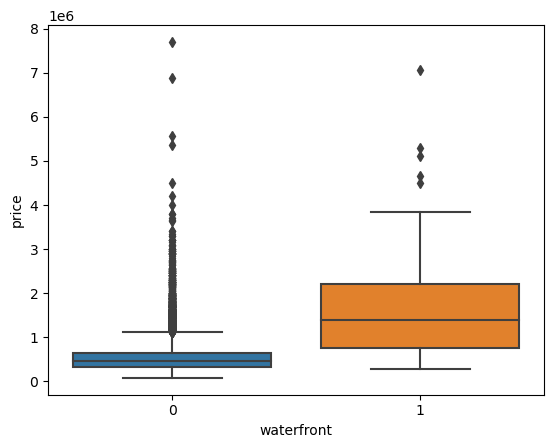

In [14]:
sns.boxplot(x='waterfront', y='price', data=df)

<AxesSubplot:xlabel='sqft_above', ylabel='price'>

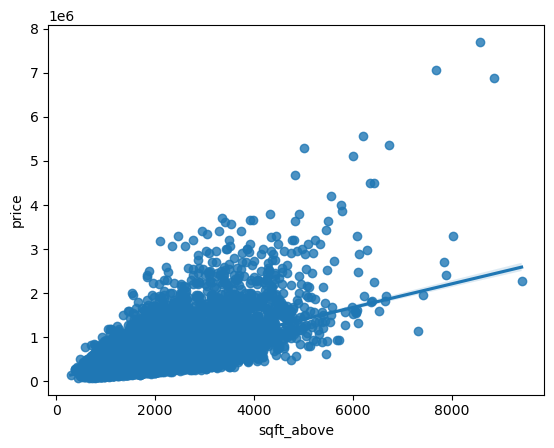

In [15]:
sns.regplot(x="sqft_above", y='price', data = df)

In [16]:
df.corr()['price'].sort_values()

/tmp/ipykernel_20847/321850276.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price'].sort_values()


zipcode         -0.053203
long             0.021626
Unnamed: 0       0.027372
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

In [17]:

x=df[['sqft_living']]
y=df[['price']]
lm = LinearRegression()
lm.fit(x,y)
lm.score(x,y)



0.4928532179037931

In [19]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms",
           "sqft_living15","sqft_above","grade","sqft_living"]     
yhat = lm.predict(df[features])
yhat

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- bathrooms
- bedrooms
- floors
- grade
- lat
- ...


In [ ]:
lm.score(df[[features]], df[['price']])


KeyError: "None of [Index([('floors', 'waterfront', 'lat', 'bedrooms', 'sqft_basement', 'view', 'bathrooms', 'sqft_living15', 'sqft_above', 'grade', 'sqft_living')], dtype='object')] are in the [columns]"

In [20]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [21]:
from sklearn.preprocessing import StandardScaler
w = df[features]
y =df['price']
Input=[('scale',StandardScaler()),('polynomial',PolynomialFeatures(include_bias=False)),('model',LinearRegression())]
pipe =Pipeline(Input)
pipe.fit(w,y)
pipe.score(w,y)

0.7505940017626009

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


In [23]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
x = df[features]
y = df['price']
x_train , x_test , y_train , y_test = train_test_split(x, y, random_state=1,test_size=0.15 )
print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


In [24]:
from sklearn.linear_model import Ridge

In [25]:
Ridge_test = Ridge(alpha=0.1)
Ridge_test.fit(x_test , y_test)
Ridge_test.score(x_test , y_test)


0.6535654800366459

In [26]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
pr 
Ridge_test.fit(x_train_pr, y_train)
Ridge_test.score(x_train_pr, y_train)

0.7418167438688049